<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(0)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_0'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20.csv',
 'data_multi_delta_0_n30.csv',
 'data_multi_delta_0_n60.csv',
 'data_multi_delta_0_n120.csv',
 'data_multi_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,48.027802,27.354725,0.611380,85.993907,85.372306,0.621601
1,0.0,1.0,51.481689,45.456425,-1.792311,105.145803,106.924787,-1.778983
2,0.0,2.0,56.171223,44.358325,-0.414808,110.114740,110.521792,-0.407051
3,0.0,3.0,21.954529,40.768202,0.689288,73.412019,72.678746,0.733273
4,0.0,4.0,27.603475,78.106419,-1.487861,114.222033,115.657879,-1.435846
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,85.686563,55.634811,-0.739647,150.581728,151.297897,-0.716169
249996,999.0,246.0,54.304775,51.817653,-0.923947,115.198482,116.135598,-0.937116
249997,999.0,247.0,95.594189,46.358813,-1.076671,150.876331,151.955728,-1.079397
249998,999.0,248.0,46.876454,80.830455,-1.972986,135.733924,137.620936,-1.887012


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,48.027802,27.354725,0.611380,85.993907,85.372306,0.621601
1,0.0,1.0,51.481689,45.456425,-1.792311,105.145803,106.924787,-1.778983
2,0.0,2.0,56.171223,44.358325,-0.414808,110.114740,110.521792,-0.407051
3,0.0,3.0,21.954529,40.768202,0.689288,73.412019,72.678746,0.733273
4,0.0,4.0,27.603475,78.106419,-1.487861,114.222033,115.657879,-1.435846
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,85.686563,55.634811,-0.739647,150.581728,151.297897,-0.716169
249996,999.0,246.0,54.304775,51.817653,-0.923947,115.198482,116.135598,-0.937116
249997,999.0,247.0,95.594189,46.358813,-1.076671,150.876331,151.955728,-1.079397
249998,999.0,248.0,46.876454,80.830455,-1.972986,135.733924,137.620936,-1.887012


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    48.027802  27.354725  0.611380   85.993907   85.372306  0.621601
      1.0    51.481689  45.456425 -1.792311  105.145803  106.924787 -1.778983
      2.0    56.171223  44.358325 -0.414808  110.114740  110.521792 -0.407051
      3.0    21.954529  40.768202  0.689288   73.412019   72.678746  0.733273
      4.0    27.603475  78.106419 -1.487861  114.222033  115.657879 -1.435846
...                ...        ...       ...         ...         ...       ...
999.0 245.0  85.686563  55.634811 -0.739647  150.581728  151.297897 -0.716169
      246.0  54.304775  51.817653 -0.923947  115.198482  116.135598 -0.937116
      247.0  95.594189  46.358813 -1.076671  150.876331  151.955728 -1.079397
      248.0  46.876454  80.830455 -1.972986  135.733924  137.620936 -1.887012
      249.0  24.753935  29.894343  1.927442   66.575720   64.762012  1.813708

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    48.027802  27.354725  0.611380   85.993907   85.372306  0.621601
      1.0    51.481689  45.456425 -1.792311  105.145803  106.924787 -1.778983
      2.0    56.171223  44.358325 -0.414808  110.114740  110.521792 -0.407051
      3.0    21.954529  40.768202  0.689288   73.412019   72.678746  0.733273
      4.0    27.603475  78.106419 -1.487861  114.222033  115.657879 -1.435846
...                ...        ...       ...         ...         ...       ...
999.0 245.0  85.686563  55.634811 -0.739647  150.581728  151.297897 -0.716169
      246.0  54.304775  51.817653 -0.923947  115.198482  116.135598 -0.937116
      247.0  95.594189  46.358813 -1.076671  150.876331  151.955728 -1.079397
      248.0  46.876454  80.830455 -1.972986  135.733924  137.620936 -1.887012
      249.0  24.753935  29.894343  1.927442   66.575720   64.762012  1.813708

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,48.027802,27.354725,0.611380,85.993907,85.372306,0.621601
1,0.0,1.0,51.481689,45.456425,-1.792311,105.145803,106.924787,-1.778983
2,0.0,2.0,56.171223,44.358325,-0.414808,110.114740,110.521792,-0.407051
3,0.0,3.0,21.954529,40.768202,0.689288,73.412019,72.678746,0.733273
4,0.0,4.0,27.603475,78.106419,-1.487861,114.222033,115.657879,-1.435846
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,85.686563,55.634811,-0.739647,150.581728,151.297897,-0.716169
249996,999.0,246.0,54.304775,51.817653,-0.923947,115.198482,116.135598,-0.937116
249997,999.0,247.0,95.594189,46.358813,-1.076671,150.876331,151.955728,-1.079397
249998,999.0,248.0,46.876454,80.830455,-1.972986,135.733924,137.620936,-1.887012


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    48.027802  27.354725  0.611380   85.993907   85.372306  0.621601
      1.0    51.481689  45.456425 -1.792311  105.145803  106.924787 -1.778983
      2.0    56.171223  44.358325 -0.414808  110.114740  110.521792 -0.407051
      3.0    21.954529  40.768202  0.689288   73.412019   72.678746  0.733273
      4.0    27.603475  78.106419 -1.487861  114.222033  115.657879 -1.435846
...                ...        ...       ...         ...         ...       ...
999.0 245.0  85.686563  55.634811 -0.739647  150.581728  151.297897 -0.716169
      246.0  54.304775  51.817653 -0.923947  115.198482  116.135598 -0.937116
      247.0  95.594189  46.358813 -1.076671  150.876331  151.955728 -1.079397
      248.0  46.876454  80.830455 -1.972986  135.733924  137.620936 -1.887012
      249.0  24.753935  29.894343  1.927442   66.575720   64.762012  1.813708

[250000 rows x 6 columns]

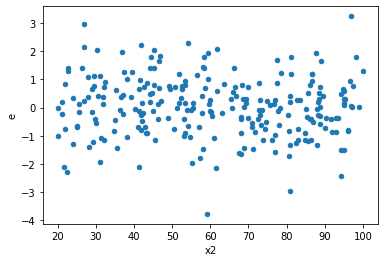

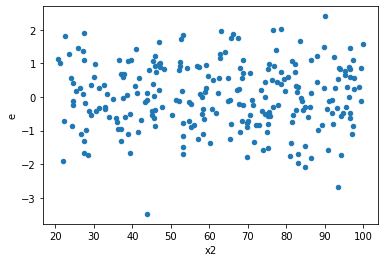

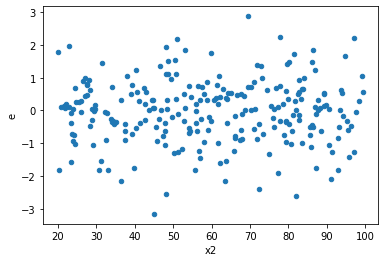

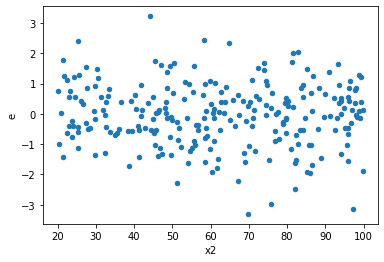

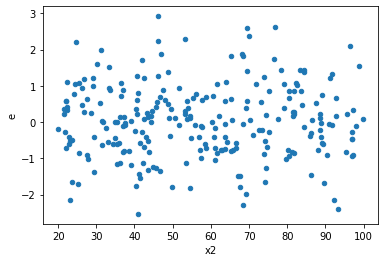

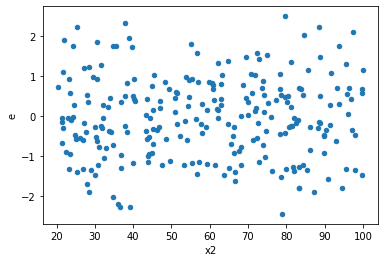

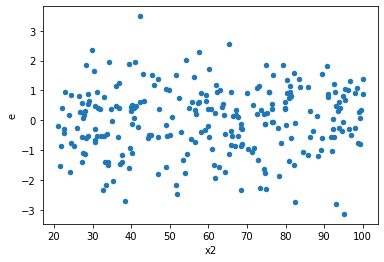

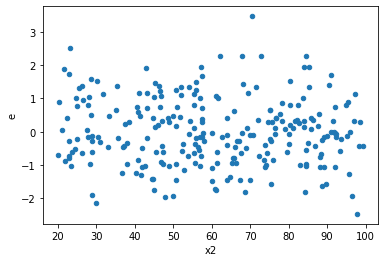

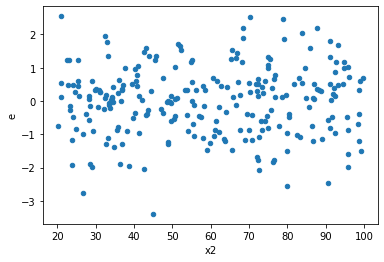

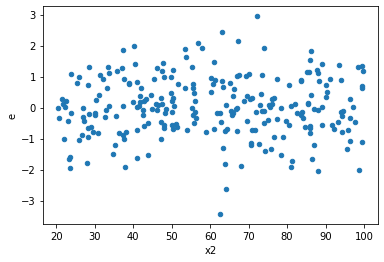

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,98.0,98.0,92.87162948465127,111.36820027554832,0.9476696886188904,1.1364102068933501,1.1991627679360783,0.37020622118945345,0.8148968894052733,0.18510311059472673,Reject005=1 : Homoscedasticity
2.0,98.0,98.0,89.07784761271282,93.09545524345214,0.9089576287011512,0.949953624933185,1.0451022082191166,0.8275916115638957,0.5862041942180521,0.41379580578194786,Reject005=1 : Homoscedasticity
3.0,98.0,98.0,79.32839811372726,105.3731919791122,0.8094734501400741,1.0752366528480837,1.32831614509657,0.16170039510585,0.919149802447075,0.080850197552925,Reject005=1 : Homoscedasticity
5.0,98.0,98.0,94.47009229925914,102.17625321904276,0.9639805336659095,1.0426148287657424,1.081572492756462,0.69868140518904,0.65065929740548,0.34934070259452,Reject005=1 : Homoscedasticity
9.0,98.0,98.0,92.9997381579957,106.07085128816149,0.9489769199795479,1.0823556253894029,1.1405499992694548,0.5163043003111469,0.7418478498444265,0.25815215015557347,Reject005=1 : Homoscedasticity
11.0,98.0,98.0,93.07569068548831,96.07551944846517,0.9497519457702889,0.9803624433516854,1.0322299919655022,0.8755521217547892,0.5622239391226054,0.4377760608773946,Reject005=1 : Homoscedasticity
12.0,98.0,98.0,95.19611263890371,97.84254805753227,0.9713889044786094,0.9983933475258395,1.0277998265398396,0.892314373198708,0.553842813400646,0.446157186599354,Reject005=1 : Homoscedasticity
13.0,98.0,98.0,92.43655117394673,109.18381261439913,0.9432301140198646,1.1141205368816238,1.1811757495034347,0.41129807401949803,0.794350962990251,0.20564903700974901,Reject005=1 : Homoscedasticity
14.0,98.0,98.0,99.07655533557308,113.68534132194429,1.010985258526256,1.160054503285146,1.14744947416562,0.49726763846302346,0.7513661807684883,0.24863381923151173,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,92.87162948465127,111.36820027554832,0.9476696886188904,1.1364102068933501,1.1991627679360783,0.37020622118945345,Reject005=1 : Homoscedasticity
1.0,98.0,98.0,111.38561278203488,90.07329868726222,1.1365878855309681,0.9191152927271655,0.808661876857672,0.2948500121872415,Reject005=1 : Homoscedasticity
2.0,98.0,98.0,89.07784761271282,93.09545524345214,0.9089576287011512,0.949953624933185,1.0451022082191166,0.8275916115638957,Reject005=1 : Homoscedasticity
3.0,98.0,98.0,79.32839811372726,105.3731919791122,0.8094734501400741,1.0752366528480837,1.32831614509657,0.16170039510585,Reject005=1 : Homoscedasticity
4.0,98.0,98.0,101.87169305989826,99.59514674136993,1.039507072039778,1.0162770075649994,0.9776528076627748,0.9111552900978728,Reject005=1 : Homoscedasticity
5.0,98.0,98.0,94.47009229925914,102.17625321904276,0.9639805336659095,1.0426148287657424,1.081572492756462,0.69868140518904,Reject005=1 : Homoscedasticity
6.0,98.0,98.0,120.87720329353867,88.81634059764862,1.233440849934068,0.9062891897719246,0.7347650191903156,0.1288480134796806,Reject005=1 : Homoscedasticity
7.0,98.0,98.0,123.69537136934775,88.70483596001044,1.2621976670341608,0.9051513873470454,0.7171233246484426,0.10144537356187472,Reject005=1 : Homoscedasticity
8.0,98.0,98.0,94.40864024844475,87.31537778365718,0.9633534719229057,0.8909732426903795,0.92486638462199,0.699814303491128,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      946
Reject005=0 : Heteroscedasticity     54
Name: Result_test, dtype: int64